# MARATONA BEHIND THE CODE 2020

## DESAFIO 6: LIT

## Testes com modelo auto-sklearn
- Autor: Rodrigo Lima
- LinkedIN: https://www.linkedin.com/in/rodrigolima82/


![title](virtual_assistance.png)

# Parte 01. Importando as bibliotecas

In [17]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.metrics import roc_auc_score, recall_score

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Parte 02. Carregando o Dataset

In [8]:
# Carregando o dataset da competição
dados = pd.read_csv('../data/training_dataset.csv')

# Visualizando os primeiros registros
print(dados.shape)
dados.head()

(15857, 15)


,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6
1,183037660.0,MBA,NaN,Supervisor,e-commerce,0.0,0.0,1.0,6.0,NaN,66.0,36.0,34.0,0.0,perfil2
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2
3,398921329.0,SEM FORMAÇÃO,UFRN,Outros,Eletroeletronicos,NaN,1.0,1.0,5.0,Instagram,29.0,10.0,6.0,0.0,perfil5
4,522842284.0,Tecnólogo,INSPER INSTITUTO DE ENSINO E PESQUISA,SEM EXPERIÊNCIA,Eletrodomesticos,NaN,0.0,1.0,7.0,Google,67.0,49.0,44.0,0.0,perfil2


# Parte 03. Preparando os Dados

In [11]:
# Remove as variáveis de ID e unique
dados.drop(['id','importante_ter_certificado'], axis = 1, inplace = True)

# Remove todos os registros que tem algum dado vazio de algumas colunas
dados.dropna(axis='index', how='any', subset=['pretende_fazer_cursos_lit',
                                              'interesse_mba_lit',
                                              'certificados'], inplace=True)

# Funcao para preencher os dados missing de algumas colunas
def preenche_missing(df):
    df['graduacao']             = df['graduacao'].fillna('Outros')
    df['universidade']          = df['universidade'].fillna('Outros')
    df['como_conheceu_lit']     = df['como_conheceu_lit'].fillna('Outros')
    df['organizacao']           = df['organizacao'].fillna('Outros')
    df['profissao']             = df['profissao'].fillna('Outros')
    df['horas_semanais_estudo'] = df['horas_semanais_estudo'].fillna(df['horas_semanais_estudo'].mean())
    df['total_modulos']         = df['total_modulos'].fillna(df['total_modulos'].median())
    df['modulos_iniciados']     = df['modulos_iniciados'].fillna(df['modulos_iniciados'].median())
    df['modulos_finalizados']   = df['modulos_finalizados'].fillna(df['modulos_finalizados'].median())

    return df
    
dados = preenche_missing(dados)    

# Categorizar as colunas categoricas
dados['categoria'] = dados['categoria'].astype("category").cat.codes
dados['graduacao'] = dados['graduacao'].astype("category").cat.codes
dados['profissao'] = dados['profissao'].astype("category").cat.codes
dados['organizacao'] = dados['organizacao'].astype("category").cat.codes
dados['como_conheceu_lit'] = dados['como_conheceu_lit'].astype("category").cat.codes
dados['universidade'] = dados['universidade'].astype("category").cat.codes

# Parte 04. Executando o Auto-sklearn

In [12]:
# Buscando todas as features do dataset apos o pre-processamento
all_features = [col for col in dados.columns if col != 'categoria']

# Separar target
X = dados[all_features]
y = dados['categoria']

In [13]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = autosklearn.classification.AutoSklearnClassifier()

automl.fit(X_train, y_train)

y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.8149649834131957


# Parte 04. Avaliação do Desempenho dos Modelos

Acurácia : 81.49649834131957
Sensibilidade : 0.9626168224299065
Especificidade : 0.9342465753424658


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       406
           1       0.82      0.85      0.83       729
           2       0.83      0.73      0.77       177
           3       0.80      0.75      0.77       331
           4       0.79      0.77      0.78       291
           5       0.83      0.84      0.83       779

    accuracy                           0.81      2713
   macro avg       0.81      0.80      0.80      2713
weighted avg       0.81      0.81      0.81      2713



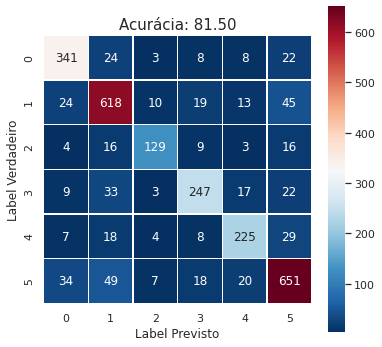

In [21]:
# Calcula o score com dados de teste
lgb_score_v1 = sklearn.metrics.accuracy_score(y_test, y_hat) * 100

# Print
print("Acurácia :", lgb_score_v1)

# Cria a matriz de confusão
conf_matriz_lgb = confusion_matrix(y_test, y_hat)
    
# Calcula especificidade e sensibilidade
speci_lgb = conf_matriz_lgb[0,0] / (conf_matriz_lgb[0,0] + conf_matriz_lgb[0,1])
sensi_lgb = conf_matriz_lgb[1,1] / (conf_matriz_lgb[1,0] + conf_matriz_lgb[1,1])

# Print
print('Sensibilidade :', sensi_lgb)
print('Especificidade :', speci_lgb)
print('\n')

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_lgb, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(lgb_score_v1), size = 15)

# Relatório de Classificação
print(classification_report(y_test, y_hat))

# Parte 05. Realizar previsões com dados de teste

# Parte 6. Submissão do Desafio 6